## CNN-Keras_res

In [1]:
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


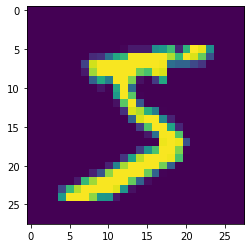

In [2]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(X_train[0])

In [3]:
#check image shape
X_train[0].shape

(28, 28)

In [0]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [5]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64,kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [7]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/5





60000/60000 [==============================] - 11s 185us/step - loss: 0.6225 - acc: 0.9238 - val_loss: 0.0967 - val_acc: 0.9707
Epoch 2/5
60000/60000 [==============================] - 9s 148us/step - loss: 0.0661 - acc: 0.9793 - val_loss: 0.0798 - val_acc: 0.9766
Epoch 3/5
60000/60000 [==============================] - 9s 148us/step - loss: 0.0472 - acc: 0.9856 - val_loss: 0.0883 - val_acc: 0.9758
Epoch 4/5
60000/60000 [==============================] - 9s 151us/step - loss: 0.0343 - acc: 0.9890 - val_loss: 0.0905 - val_acc: 0.9784
Epoch 5/5
60000/60000 [==============================] - 9s 150us/step - loss: 0.0266 - acc: 0.9917 - val_loss: 0.1296 - val_acc: 0.9752


In [9]:
#predict first 4 images in the test set
model.predict(X_test[:4])

array([[6.3712647e-13, 1.1151406e-18, 4.6587484e-13, 1.1874587e-12,
        1.0419889e-20, 1.5915097e-16, 3.7386544e-22, 1.0000000e+00,
        3.0502643e-12, 2.9000426e-12],
       [1.4259934e-09, 1.8644306e-06, 9.9997866e-01, 7.3415229e-09,
        7.1053731e-15, 1.0427884e-15, 1.9428444e-05, 2.1297606e-15,
        4.3609059e-09, 4.7931179e-17],
       [2.2682010e-10, 9.9999571e-01, 7.5110220e-09, 1.2419036e-12,
        1.4112894e-06, 2.2470670e-10, 4.5929367e-09, 1.8002190e-13,
        2.8460038e-06, 1.6405254e-13],
       [9.9999988e-01, 3.2037704e-17, 5.3020482e-10, 8.1109923e-14,
        9.9067525e-15, 1.6461854e-11, 6.9012941e-08, 1.2710128e-16,
        5.0900684e-10, 1.7537515e-09]], dtype=float32)

In [10]:
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten_4 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [44]:

pesos=model.layers[0].get_weights()[0]
print(pesos.shape)
pesos[:,:,:,0]


(3, 3, 1, 64)


array([[[ 0.04296239],
        [-0.07560658],
        [-0.08553647]],

       [[ 0.0853772 ],
        [ 0.08583303],
        [ 0.0038439 ]],

       [[-0.03616666],
        [ 0.04777864],
        [-0.0680145 ]]], dtype=float32)